# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import label_binarize, LabelEncoder

In [2]:
# Improving the front size of the figures 
import pylab as plb
plb.rcParams['font.size'] = 14

In [3]:
df = pd.read_csv('students_adaptability_level_online_education.csv')
var_def = pd.read_csv('Variabel Definition - Sheet1.csv')

# Data Exploration

In [4]:
# Dataframe with definition of each column 
var_def

,Column,Variable Definition
0,Gender,Gender of student
1,Age,Age range of student
2,Education Level,Education institution level
3,Institution Type,Education institution type
4,IT Student,Studying as IT student
5,Location,Is student location in town
6,Load-shedding,Level of load shedding
7,Financial Condition,Financial condition of family
8,Internet Type,Internet type used mostly in device
9,Network Type,Network connectivity type


In [5]:
# First five rows
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [6]:
df.shape

(1205, 14)

##### From the table, we notice that all the features collected in our data are of categorical datatype.

In [7]:
# cheking the characteristics of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


### Check for missing values

In [8]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

##### The dataset does not contain NaN values

# Data Analysis

### Gender

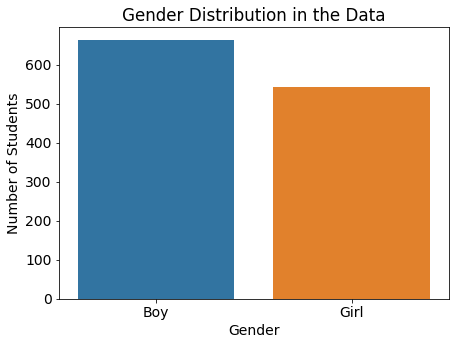

In [9]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x=df.Gender, ax=ax)
ax.set_title('Gender Distribution in the Data')
plt.ylabel('Number of Students')
plt.savefig('gender_plot.png', dpi=300)

plt.show()

From the plot above, the number of male respondents are slightly more than the number of female respondents from the survery

### Age

In [10]:
df.Age.unique()

array(['21-25', '16-20', '11-15', '26-30', '6-10', '1-5'], dtype=object)

In [11]:
# View the plot of age distribution in a specific order

age_order = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']

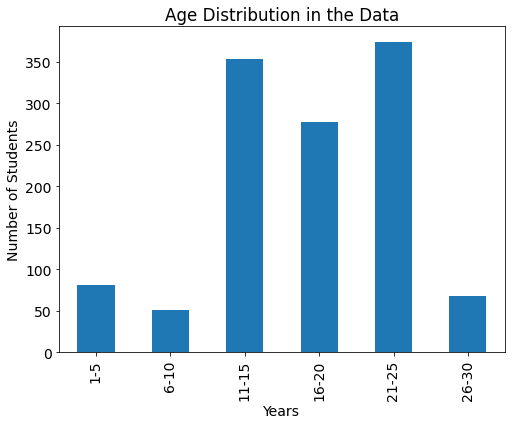

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
df.Age.value_counts().loc[age_order].plot(kind='bar', ax=ax)

ax.set_title('Age Distribution in the Data')
plt.ylabel('Number of Students')
plt.xlabel('Years')
plt.savefig('age_dist_plot.png' ,dpi=300)
plt.show()


The distribution of the respondent's age follows a normal distribution pattern, the most occuring age bracket is 21-25  years

Also the age distribution looks like a bi-modal distribution, Bi-modal distribution seems more appropriate for the age distribution with modes of (11-15) and (21-25)

### Education Level

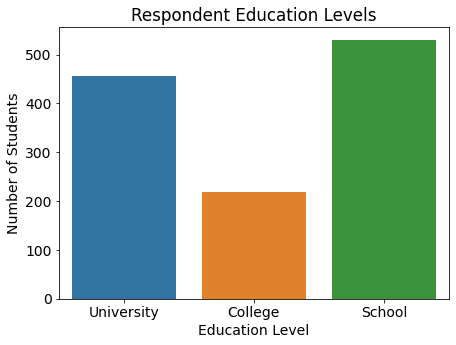

In [13]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x=df['Education Level'], ax=ax)

ax.set_title('Respondent Education Levels')
plt.ylabel('Number of Students')
plt.savefig('education_plot.png' ,dpi=300)
plt.show()

Most of the respondents to the survey were students attending formal educational institutes that offer just primary and secondary education

College significanlty have the least number of respondents

### Device

In [14]:
df['Device'].unique()

array(['Tab', 'Mobile', 'Computer'], dtype=object)

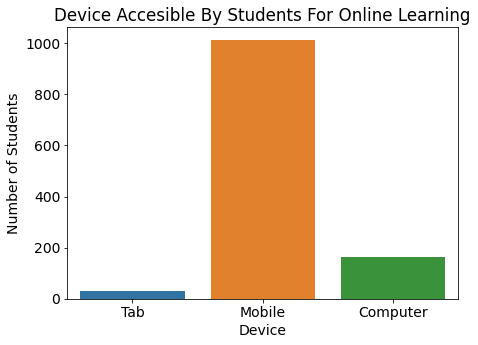

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x=df['Device'], ax=ax)

plt.ylabel('Number of Students')
ax.set_title("Device Accesible By Students For Online Learning")
plt.savefig('device_plot.png' ,dpi=300)
plt.show()

From the plot above, only few students have access to Computer, most of the students have access to mobile.

### Target Analysis (Adaptivty feature)

In [16]:
df['Adaptivity Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

The aim of this project is to predict how well a student is likely to adapt to an online learning system. <p>
The target feature contains 3 unique levels which are Low, Medium and High levels of adaptability. 

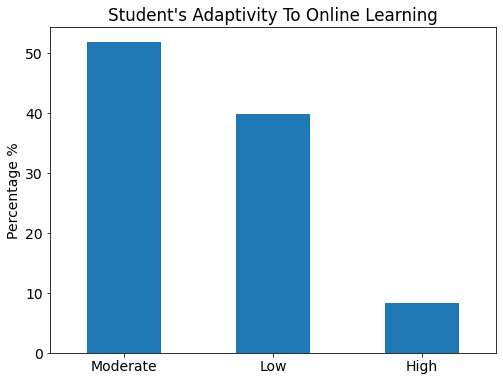

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
(df['Adaptivity Level'].value_counts(normalize=True) * 100).plot(kind='bar', ax=ax)

ax.set_title("Student's Adaptivity To Online Learning")
plt.ylabel('Percentage %')
plt.xticks(rotation=0)
plt.savefig('adaptivity.png' ,dpi=300)
plt.show()

The dataset is imbalanced because there are significantly lesser samples (~10%) with High adaptivity level, compared Moderate and Low Adaptivity levels.

### Age & Adaptability Level

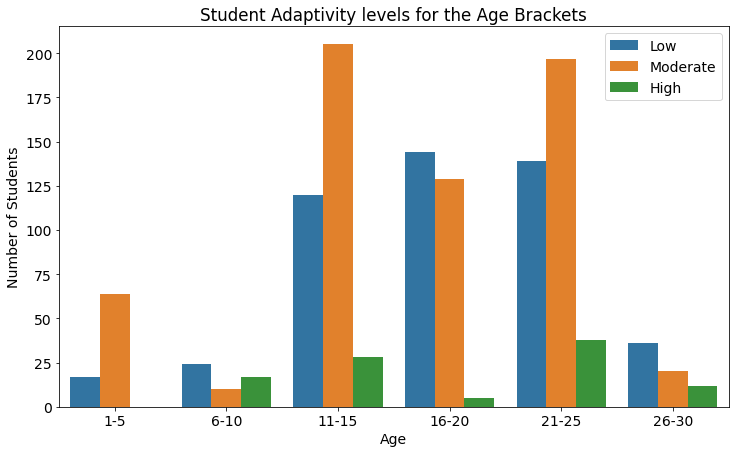

In [18]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x=df['Age'], ax=ax, hue=df['Adaptivity Level'], order=age_order, hue_order=['Low','Moderate', 'High'])

ax.set_title("Student Adaptivity levels for the Age Brackets")
plt.ylabel('Number of Students')
plt.legend(loc='upper right')
plt.savefig('age_adapt.png' ,dpi=300)
plt.show()

From the plot above, we see that students within the age bracket 16-20, have the highest number of students with the low level of adaptability. <p>
None of the students in age bracket 1-5 are recorded to have a high adaptivity level to online learning

### Gender & Adaptivity Level

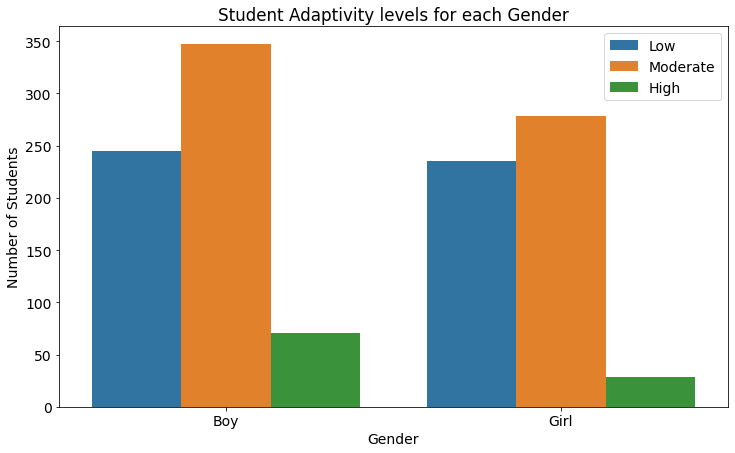

In [19]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x=df['Gender'], ax=ax, hue=df['Adaptivity Level'], hue_order=['Low','Moderate', 'High'])

ax.set_title("Student Adaptivity levels for each Gender")
plt.ylabel('Number of Students')
plt.legend(loc='upper right')
plt.savefig('gender_adapt.png' ,dpi=300)
plt.show()

Only by taking the proportion of Low and High adaptability levels for each gender in the dataset, we can infer that male students tend to show higher adaptability than female.

### Load Shedding & Adaptivity Level

How level of Level of load shedding affects student adaptivity

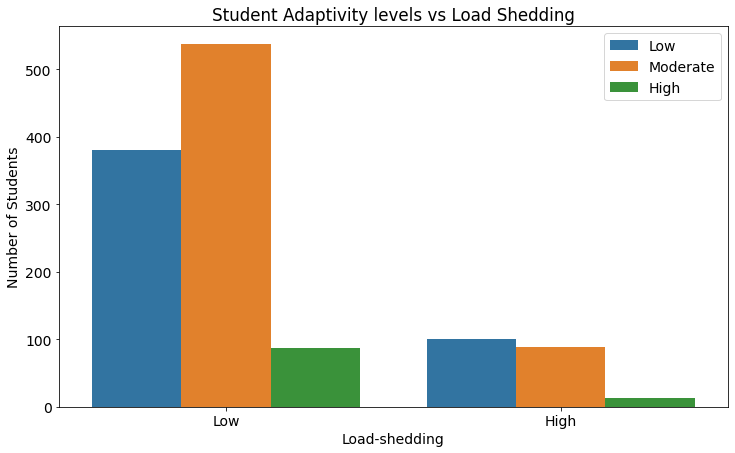

In [20]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x=df['Load-shedding'], ax=ax, hue=df['Adaptivity Level'], hue_order=['Low','Moderate', 'High'])

ax.set_title("Student Adaptivity levels vs Load Shedding")
plt.ylabel('Number of Students')
plt.legend(loc='upper right')
plt.savefig('load_shed_adapt.png' ,dpi=300)
plt.show()

Students that live in area with High load shedding level tend to show low adaptivity level

### Class Duration vs Adaptivity Level

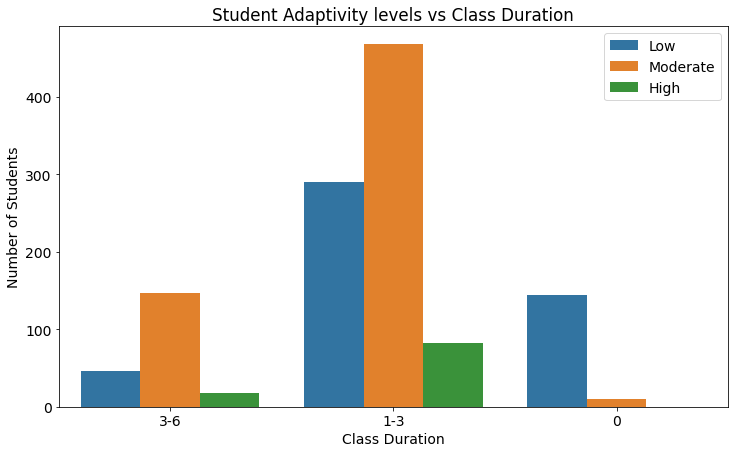

In [21]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x=df['Class Duration'], ax=ax, hue=df['Adaptivity Level'], hue_order=['Low','Moderate', 'High'])

ax.set_title("Student Adaptivity levels vs Class Duration")
plt.ylabel('Number of Students')
plt.legend(loc='upper right')
plt.savefig('class_dur_adapt.png' ,dpi=300)
plt.show()

### Education Level & Adaptivity Level

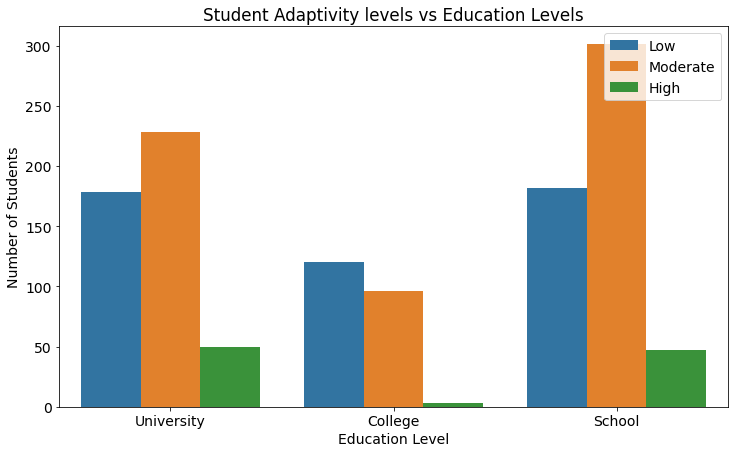

In [22]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x=df['Education Level'], ax=ax, hue=df['Adaptivity Level'], hue_order=['Low','Moderate', 'High'])

ax.set_title("Student Adaptivity levels vs Education Levels")
plt.ylabel('Number of Students')
plt.legend(loc='upper right')
plt.savefig('educ_adapt.png' ,dpi=300)
plt.show()

The plot above shows the relationship between Adaptivity level and Education Level of students

### Network Type & Adaptivity Level

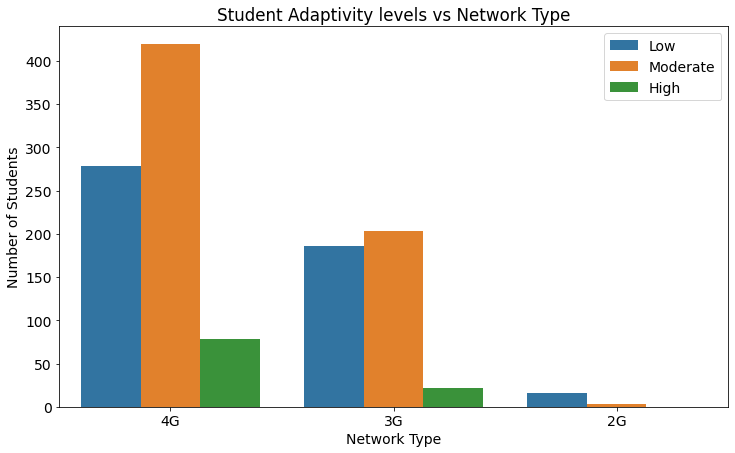

In [23]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x=df['Network Type'], ax=ax, hue=df['Adaptivity Level'], hue_order=['Low','Moderate', 'High'])

ax.set_title("Student Adaptivity levels vs Network Type")
plt.ylabel('Number of Students')
plt.legend(loc='upper right')
plt.savefig('network_adapt.png' ,dpi=300)
plt.show()

Students that only have access to a 2G network are likely to show low adaptability to online education, this makes sense because 2G network is the slowest amongst the network types.

### Location & Adaptivity Level

Is student location in town? <p>
How students location affects adaptivity level

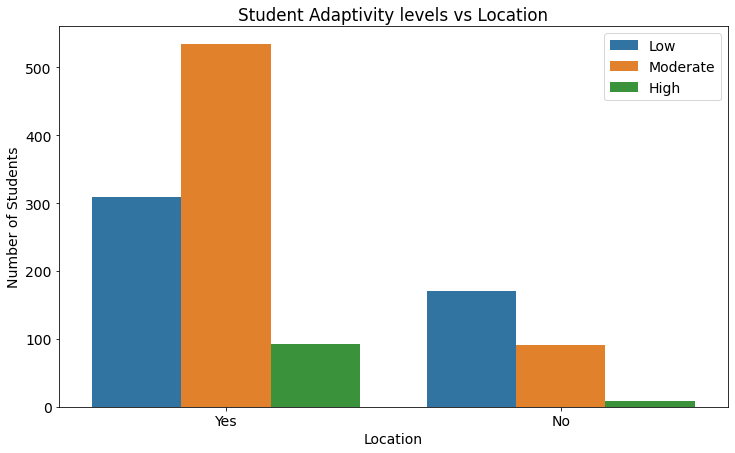

In [24]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x=df['Location'], ax=ax, hue=df['Adaptivity Level'], hue_order=['Low','Moderate', 'High'])

ax.set_title("Student Adaptivity levels vs Location")
plt.ylabel('Number of Students')
plt.legend(loc='upper right')
plt.savefig('location_adapt.png' ,dpi=300)
plt.show()

# Data Preprocessing

In [25]:
# Types of columns
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Columns: 14 entries, Gender to Adaptivity Level
dtypes: object(14)
memory usage: 131.9+ KB


### Convert columns to category column

In [26]:
for col in df.columns.drop('Age'):  # Drop Age because we intend to treat Age as numerical
    df[col] = df[col].astype('category')

### Transform Age Values 

#### The age values are currently in a bracket, the ages would be transformed by taking the mean of the age brackets

In [27]:
def transform_age(age):
    '''
    function transform age values within a bracket seperated by hyphen  -
    
    args:
        age: age bracket
    returns:
        age_mean: Average of age values within bracket
        
    '''
    low, up = age.split('-')
    # Convert string age values to integer
    low, up = int(low), int(up)
    
    age_mean = np.mean([low,up])
    return age_mean

In [28]:
df['Age_new'] = df.Age.apply(transform_age)

In [29]:
df['Age_new'].sample(3)

660     13.0
692     23.0
1120    13.0
Name: Age_new, dtype: float64

In [30]:
# View the plot of Transformed age distribution in a specific order

stat_order = ['min', 'std', '25%', '50%', 'mean', '75%', 'max']

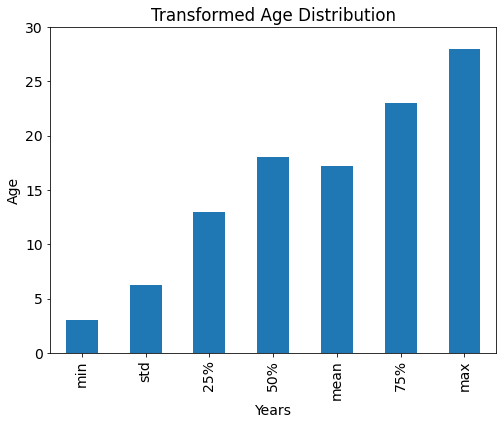

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
df['Age_new'].describe().loc[stat_order].plot(kind='bar', ax=ax)

ax.set_title('Transformed Age Distribution')
plt.ylabel('Age')
plt.ylim(0, 30)
plt.xlabel('Years')
plt.savefig('age_stat_plot.png' ,dpi=300)
plt.show()

From the plot above, the mean age of students is slightly less than the median (50% percentile), this means that the age distribution is slightly negatively (left) skewed.

In [32]:
df.head(1)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Age_new
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate,23.0


In [33]:
cols_to_drop=set()

In [34]:
# adding age to the set to drop 
cols_to_drop.add('Age')

In [35]:
# drop age
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

In [36]:
df.nunique()

Gender                 2
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
Age_new                6
dtype: int64

### one-hot Encoding 

In [37]:
# adding columns that needs one hot encoder to a list
one_hot_encode_cols = ['Gender',  'IT Student', 'Location', 'Load-shedding', 'Internet Type', 'Self Lms']

In [38]:
# One hot encode columns

df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)  # drop_first is set to True to avoid the dummy variable trap
df.shape

(1205, 14)

### Mapping 

In [39]:
# Encode the values in columns

df['Education Level'] = df['Education Level'].map({'School':1, 'College':2, 'University':3})

df['Financial Condition'] = df['Financial Condition'].map({'Poor':1, 'Mid':2, 'Rich':3})

df['Institution Type'] = df['Institution Type'].map({'Government':0, 'Non Government':1})

df['Network Type'] = df['Network Type'].map({'2G':1, '3G':2, '4G':3})

df['Class Duration'] = df['Class Duration'].map({'0':2, '1-3':1, '3-6':0})

df['Device'] = df['Device'].map({'Tab':1, 'Mobile':2, 'Computer':3})

### LabelEncoder for target column

In [40]:
enc = LabelEncoder()
df['Adaptivity Level'] = enc.fit_transform(df['Adaptivity Level'])

In [41]:
df.head(30)

,Education Level,Institution Type,Financial Condition,Network Type,Class Duration,Device,Adaptivity Level,Age_new,Gender_Girl,IT Student_Yes,Location_Yes,Load-shedding_Low,Internet Type_Wifi,Self Lms_Yes
0,3,1,2,3,0,1,2,23.0,0,0,1,1,1,0
1,3,1,2,3,1,2,2,23.0,1,0,1,0,0,1
2,2,0,2,3,1,2,2,18.0,1,0,1,1,1,0
3,1,1,2,3,1,2,2,13.0,1,0,1,1,0,0
4,1,1,1,2,2,2,1,18.0,1,0,1,1,0,0
5,1,1,1,2,1,2,1,13.0,0,0,1,1,0,0
6,1,1,2,3,2,2,1,13.0,0,0,1,1,1,0
7,1,1,2,3,1,2,2,13.0,0,0,1,1,1,0
8,2,0,2,3,1,2,1,18.0,0,0,1,1,1,0
9,1,1,2,2,1,2,2,13.0,0,0,1,1,0,0


In [42]:
# assign X and y
X = df.drop('Adaptivity Level', axis=1)
y = df['Adaptivity Level']

In [43]:
X.shape, y.shape

((1205, 13), (1205,))

# Machine Learning (Imbalanced Dataset)

### Split Data Into Train and Test Splits

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [45]:
X_train.shape, y_test.shape

((964, 13), (241,))

### Fit Data on Different Machine Learning Algorithm (Imbalanced Data)

In [46]:
# importing models and metrics 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_auc_score, roc_curve

In [47]:
models = {
    'Logistic Regression':  LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42,),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=0, n_jobs=-1),
    'SVC': SVC(random_state=2022, probability=True),
    'XGBoost': XGBClassifier(random_state=20, tree_method="hist", enable_categorical=True)}

In [48]:
accuracies, f_scores, cf_matrixes, roc_auc_scores = [], [], [], []

In [49]:
cf_matrixes = []

In [50]:
def create_result_df(model_name, model, X_test, y_test):
    '''
    function to create pandas dataframe containing metric results on test data
    
    args:
        model_name: Name of trained model
        
        model: trained machine learning model
        
        X_test: dataset for the model to be tested on
        
        y_test: the correct label for the test dataset
        
    returns:
        res_df: pandas dataframe containing metric results on test data
    '''
    
    # generate prediction on test data
    preds = model.predict(X_test)
    cont_preds = model.predict_proba(X_test)
    
    res_df = pd.DataFrame()
    res_df['Model_Name'] = [ model_name ]
    res_df['Test_Accuracy'] = [ accuracy_score(y_test, preds) ]
    res_df['F1_Score'] = [ f1_score(y_test, preds, average='weighted') ]
    res_df['ROC_AUC'] = [ roc_auc_score(y_test, cont_preds, multi_class='ovr') ]
    cf_matrix = confusion_matrix(y_test, preds)

    return res_df, cf_matrix

In [51]:
eval_df = []

# Iterate through the defined models in dictionary 
for name, model in models.items():
    print('Currently Training: {} Model'.format(name))
    model.fit(X_train, y_train)
    
    res_df,cf_matrix = create_result_df(name, model, X_test, y_test)
    cf_matrixes.append(cf_matrix)
    eval_df.append(res_df)
    
    del res_df, cf_matrix, model

Currently Training: Logistic Regression Model
Currently Training: Decision Tree Model
Currently Training: KNN Model
Currently Training: Random Forest Model
Currently Training: SVC Model
Currently Training: XGBoost Model


In [52]:
eval_df = pd.concat(eval_df)
eval_df.set_index('Model_Name', inplace=True)
eval_df

,Test_Accuracy,F1_Score,ROC_AUC
Model_Name,,,
Logistic Regression,0.721992,0.690257,0.789455
Decision Tree,0.925311,0.924919,0.980680
KNN,0.755187,0.751760,0.927194
Random Forest,0.908714,0.907475,0.986008
SVC,0.643154,0.595238,0.836578
XGBoost,0.917012,0.916268,0.987907


### Find the best model

In [53]:
# Using F1_score as metric to determine the best model on the test dataset

eval_df['F1_Score'].idxmax() 

'Decision Tree'

### Test Accuracy plot for the different models  (Imbalanced Data)

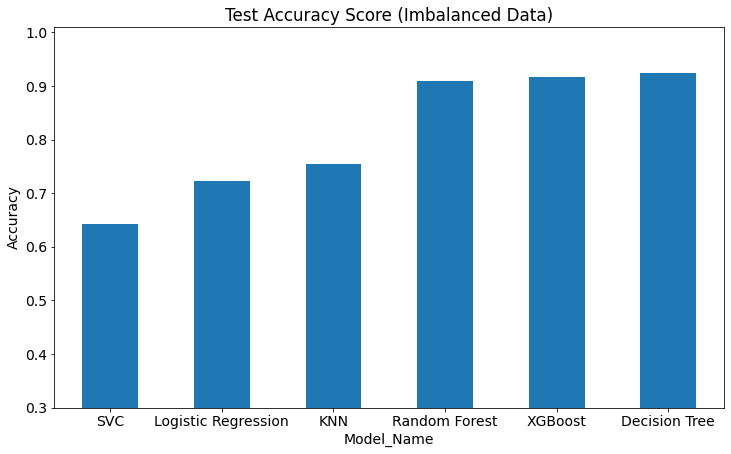

In [54]:
fig, ax = plt.subplots(figsize=(12,7))
eval_df['Test_Accuracy'].sort_values().plot(kind='bar', ax=ax)
plt.ylim(0.3,1.01)
plt.ylabel('Accuracy')
plt.title('Test accuracy score (Imbalanced Data)'.title())
plt.xticks(rotation=0)
plt.savefig('accuracy_imbalanced_plot.png' ,dpi=300)
plt.show()

Decision tree classifier is able to produce the best accuracy score on the test data


### Plot Confusion Matrix of Decison Tree Model

In [55]:
def plot_cf_matrix(cf_matrix, unique_labels, title='Confusion matrix'):
    '''
    function to make heatmap of confusion matrix

    args:

    cf_matrix: numpy array of confusion matrix values

    unique_labels: unique label values present in data

    '''

    cm_df = pd.DataFrame(cf_matrix, index=unique_labels, columns=unique_labels)
    fig, ax = plt.subplots(figsize=(9,7))

    sns.heatmap(cm_df, annot=True, ax=ax, cmap="Blues", fmt='.0f', cbar=False)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Truth')
    ax.set_title(title)
    plt.savefig('{}.png'.format(title) ,dpi=300)
    plt.show()

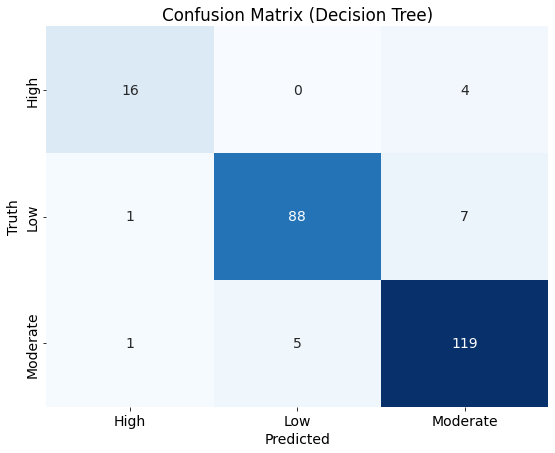

In [56]:
plot_cf_matrix( cf_matrixes[ eval_df.index.to_list().index('Decision Tree') ], enc.inverse_transform(models['Decision Tree'].classes_), 
              title='Confusion Matrix (Decision Tree)')

### ROC_AUC Curve of Decision Tree

In [57]:
def roc_curve_plot(model, title='Receiver Operating Characteristic'):
    '''
    function to make roc_curve 
    '''
    
    pred =  model.fit(X_train, y_train).predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = len(np.unique(y_test))
    
    fpr, tpr, roc_auc = {}, {}, {}
    colors = ['green', 'blue', 'red']
    fig, ax = plt.subplots(figsize=(11,8))
    
    for i, class_name, color in zip( range(n_classes), enc.classes_, colors):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred[:, i], )
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(class_name, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')

        plt.title(title)
        plt.xlim([-0.05, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")

    plt.savefig('{}.png'.format(title) ,dpi=300)
    plt.show()
    

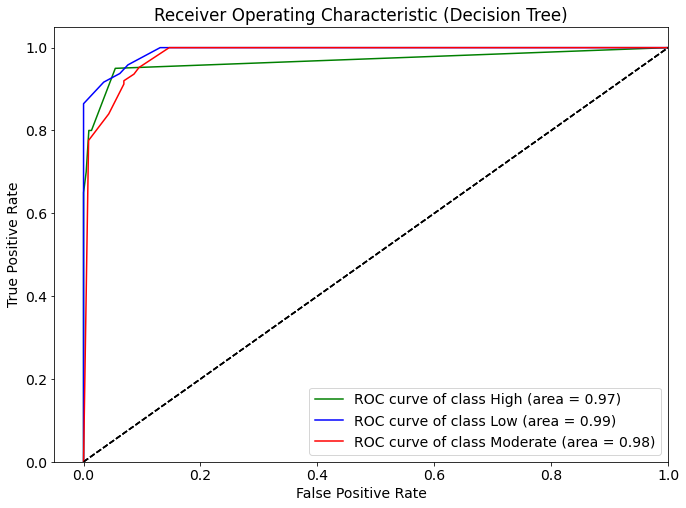

In [58]:
roc_curve_plot(models['Decision Tree'], 'Receiver Operating Characteristic (Decision Tree)')

### Analyse Feature Importance Of Decison Tree Model 

In [59]:
# Create pandas dataframe to store feature importance of model

dtc_imp = pd.DataFrame(index=models['Decision Tree'].feature_names_in_)
dtc_imp['Importance'] = models['Decision Tree'].feature_importances_

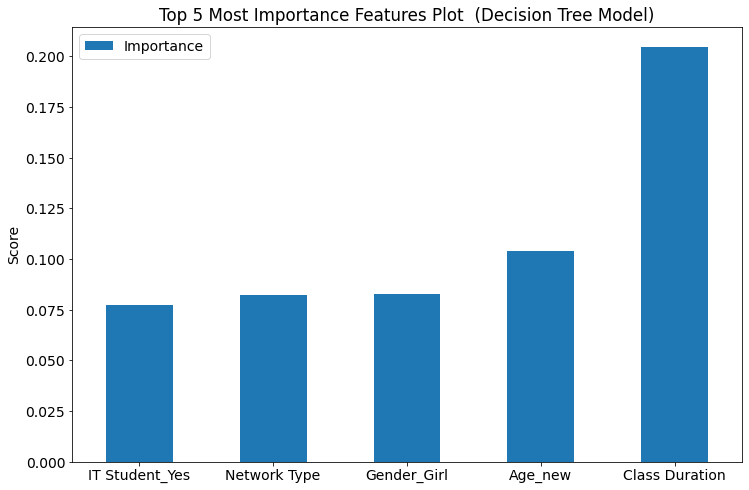

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Top 5 Most Importance Features Plot  (Decision Tree Model)')
dtc_imp.sort_values('Importance')[-5:].plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.savefig('feat_imp_DTC.png', dpi=300)
plt.show()

From the plot above, Class Duration is the feature that contributes the most to the Decision Tree model

### HyperParameter Tuning (imbalanced Data)

In [61]:
model_params = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 2000]},
    
    'Decision Tree': {'max_depth': [3, 7, 15, 25, None], 'min_samples_split': [2, 3, 5]},
    
    'KNN': {'n_neighbors': range(1, 20, 2)},
    
    'Random Forest': {'n_estimators': [10, 50, 100, 300], 'max_depth': [2, 5, 8, 12, None], 'min_samples_split': [2, 3, 5]},
    
    'SVC': {'C': [0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf']},
    
    'XGBoost': {"learning_rate": [0.001, 0.10, 0.15,  0.3 ], "max_depth": [ 2, 6, 10, 15], "min_child_weight" : [ 1, 3, 5, 7 ]}}

In [62]:
def parameter_search(models_and_params:dict, features, target):
    '''
    function to perform hyperparameter tuninig on different machine learning models
    
    args:
        models_and_params: dictionary containing name of model and a list of parameters to search as key, value pair.
        
        features: dataset containing independent features to fit models on 
        
        target: attribute data to be predicted
    
    returns:
        tuned_models: dictionary containing name of model and tuned machine learning models as key, value pair.
        
    '''
    
    tuned_models = {}
    
    for model_name, model_params in models_and_params.items(): 
        model_search = RandomizedSearchCV(models[model_name], model_params, cv=3, scoring='f1_weighted', random_state=0)
        model_search.fit(features, target)
        
        print("{}, Tuned Hyperparameters : {} \n".format(model_name, model_search.best_params_))
        tuned_models[model_name] = model_search.best_estimator_
    
    return tuned_models

In [63]:
tuned_models = parameter_search(model_params, X_train, y_train)

Logistic Regression, Tuned Hyperparameters : {'max_iter': 1000, 'C': 10} 

Decision Tree, Tuned Hyperparameters : {'min_samples_split': 2, 'max_depth': 15} 

KNN, Tuned Hyperparameters : {'n_neighbors': 1} 

Random Forest, Tuned Hyperparameters : {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None} 

SVC, Tuned Hyperparameters : {'kernel': 'rbf', 'C': 1000} 

XGBoost, Tuned Hyperparameters : {'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.15} 



In [64]:
eval_df_tuned = []

# Iterate through the tuned models 
for name, model in tuned_models.items():
    res_df, cf_matrix = create_result_df(name, model, X_test, y_test)
    eval_df_tuned.append(res_df)
    
    del res_df, cf_matrix, model

In [65]:
eval_df_tuned = pd.concat(eval_df_tuned)
eval_df_tuned.set_index('Model_Name', inplace=True)
eval_df_tuned.columns = eval_df_tuned.columns + '_tuned'

eval_df_tuned

,Test_Accuracy_tuned,F1_Score_tuned,ROC_AUC_tuned
Model_Name,,,
Logistic Regression,0.730290,0.703179,0.791248
Decision Tree,0.925311,0.924919,0.980680
KNN,0.871369,0.870433,0.871704
Random Forest,0.887967,0.885451,0.979740
SVC,0.792531,0.789035,0.913648
XGBoost,0.917012,0.916268,0.989742


### Check improvement of models when tuned (Imbalanced data)

In [66]:
def tuned_model_result_diff(metric, eval_df1, eval_df2, title):
    '''
    function to compare performances of machine learning models when tuned and untuned
    
    args:
        metric: Metric result to compare
        
        eval_df1: evaluation dataframe of untuned model
        
        eval_df2: evaluation datafame of tuned model
        
        title: title of barplot
    '''
    
    tmp = pd.concat([eval_df1[metric], eval_df2['{}_tuned'.format(metric)] ], axis=1).reset_index()
    display(tmp)
    fig, ax = plt.subplots(figsize=(14,7))
    tmp.plot(x='Model_Name', kind='bar', ax=ax)

    plt.ylim(0.5, 1)
    plt.ylabel('score')
    plt.title(title)
    plt.xticks(rotation=0)
    plt.legend(loc='upper left')
    plt.savefig('{}'.format(title), dpi=300)
    plt.show()

,Model_Name,F1_Score,F1_Score_tuned
0,Logistic Regression,0.690257,0.703179
1,Decision Tree,0.924919,0.924919
2,KNN,0.751760,0.870433
3,Random Forest,0.907475,0.885451
4,SVC,0.595238,0.789035
5,XGBoost,0.916268,0.916268


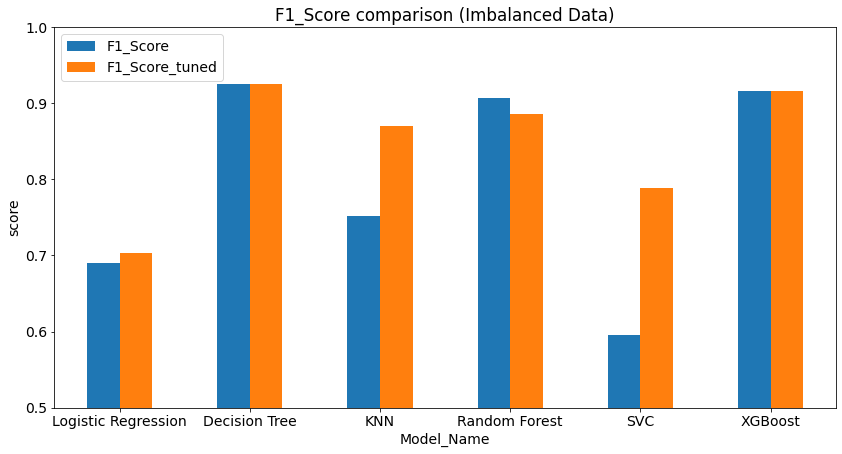

In [67]:
tuned_model_result_diff('F1_Score', eval_df, eval_df_tuned, 'F1_Score comparison (Imbalanced Data)')

The model that improves the most after hyperparameter tuning is the SVC. <p>
Tuning the hyperparameters of tree models such as Decision Tree, Random Forest and XGBoost does not yield a significant improvement in F1 score.

# Machine Learning (Balanced Dataset)

### To balance the classes in the dataset, RandomOverSampling method is used

In [68]:
from imblearn.over_sampling import RandomOverSampler

In [69]:
over_sampler = RandomOverSampler(random_state=0)

In [70]:
X_bal, y_bal = over_sampler.fit_resample(X, y)

In [71]:
perc_inc = (X_bal.shape[0] - X.shape[0]) / X.shape[0]

print('Percentage increase from original data size is {:.2f}%'.format(perc_inc*100))

Percentage increase from original data size is 55.60%


### Compare Target for Balanced & Imbalanced Dataset

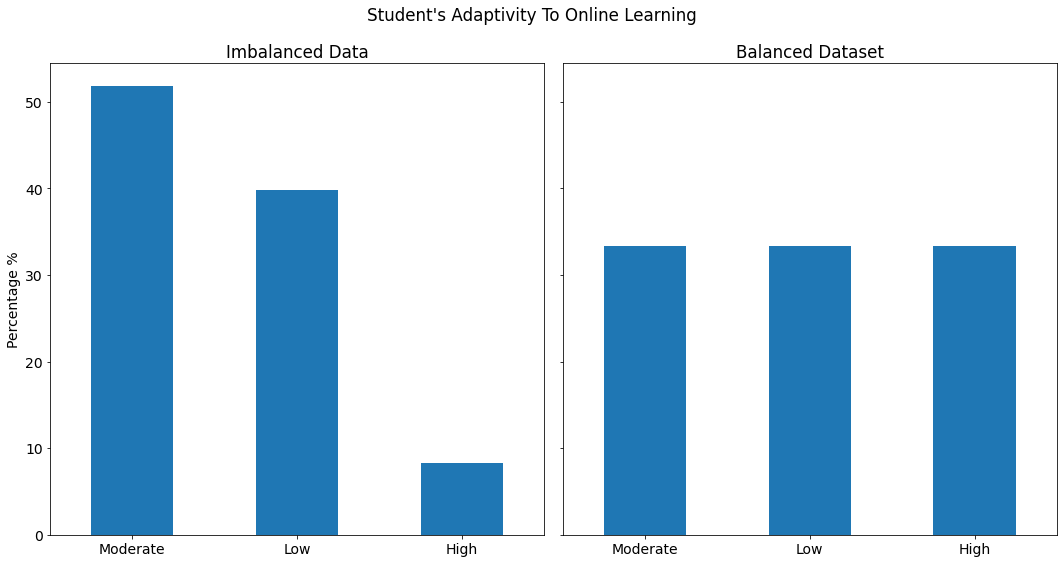

In [72]:
# define figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8), sharey=True, sharex=True)
fig.suptitle("Student's Adaptivity To Online Learning")
ax1, ax = axes

# Plot target for imbalanced data
(pd.Series(y).value_counts(normalize=True) * 100).plot(kind='bar', ax=ax1)
ax1.set_title("Imbalanced Data")
ax1.tick_params(axis="x", rotation=0)
ax1.set_ylabel('Percentage %')

# Plot target for balanced data
y_bal_inv = pd.Series( enc.inverse_transform(y_bal) )
(y_bal_inv.value_counts(normalize=True) * 100).plot(kind='bar', ax=ax)
ax.set_title("Balanced Dataset")

# display plot nicely
ax.tick_params(axis="x", rotation=0)
plt.tight_layout()
plt.savefig('imbal_bal.png', dpi=300)
plt.show()

The target feature in our data is now balanced

### Split Data Into Train and Test Splits

In [73]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)

### Fit Data on Different Machine Learning Algorithm (Balanced Data)

In [74]:
models_bal = {
    'Logistic Regression':  LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42,),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=0, n_jobs=-1),
    'SVC': SVC(random_state=2022, probability=True),
    'XGBoost': XGBClassifier(random_state=20, tree_method="hist", enable_categorical=True)}

In [75]:
 cf_matrixes_bal = []

In [76]:
eval_df_bal = []

# Iterate through the defined models in dictionary 
for name, model in models_bal.items():
    print('Currently Training: {} Model'.format(name))
    model.fit(X_train_bal, y_train_bal)
    
    res_df, cf_matrix = create_result_df(name, model, X_test_bal, y_test_bal)
    cf_matrixes_bal.append(cf_matrix)
    eval_df_bal.append(res_df)
    
    del res_df, cf_matrix, model

Currently Training: Logistic Regression Model
Currently Training: Decision Tree Model
Currently Training: KNN Model
Currently Training: Random Forest Model
Currently Training: SVC Model
Currently Training: XGBoost Model


In [77]:
eval_df_bal = pd.concat(eval_df_bal)
eval_df_bal.set_index('Model_Name', inplace=True)
eval_df_bal

,Test_Accuracy,F1_Score,ROC_AUC
Model_Name,,,
Logistic Regression,0.706667,0.702916,0.796416
Decision Tree,0.920000,0.919249,0.983312
KNN,0.837333,0.836890,0.955787
Random Forest,0.922667,0.921964,0.985141
SVC,0.589333,0.592858,0.828971
XGBoost,0.925333,0.924656,0.985216


In [78]:
print('Using Over Sampled Balanced Dataset, the model with the best F1_score is {}'.format(eval_df_bal['F1_Score'].idxmax()))

Using Over Sampled Balanced Dataset, the model with the best F1_score is XGBoost


### Confusion Matrix for XGBoost on Test data (Balanced Data)

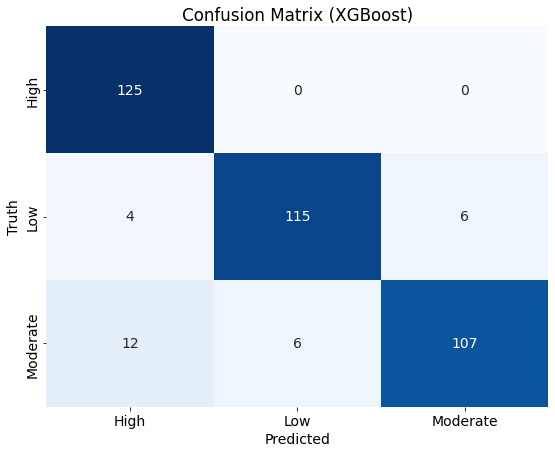

In [79]:
plot_cf_matrix( cf_matrixes_bal[ eval_df_bal.index.to_list().index('XGBoost') ], enc.inverse_transform(models_bal['XGBoost'].classes_),
              title='Confusion Matrix (XGBoost)')

### Test Accuracy plot for the different models (Balanced Data)

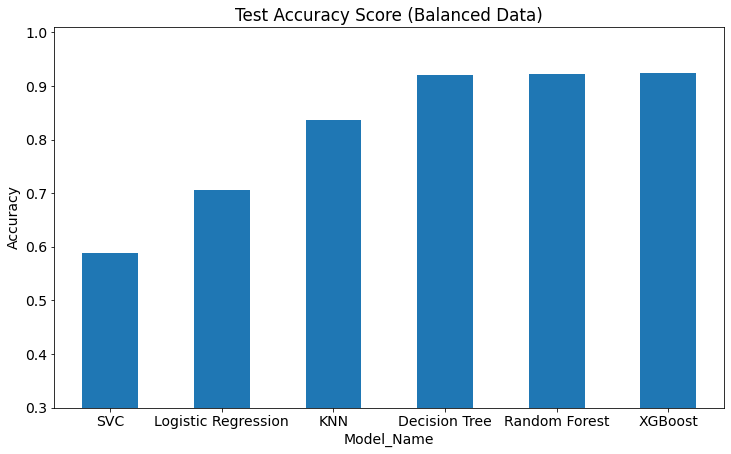

In [80]:
fig, ax = plt.subplots(figsize=(12,7))
eval_df_bal['Test_Accuracy'].sort_values().plot(kind='bar', ax=ax)

plt.ylim(0.3,1.01)
plt.ylabel('Accuracy')
plt.title('Test accuracy score (Balanced Data)'.title())
plt.xticks(rotation=0)
plt.savefig('accuracy_bal_plot.png' ,dpi=300)
plt.show()

XGBoost classifier is able to produce the best accuracy score on the test data when using a balanced dataset

### Analyse Feature Importance Of XGBoost Model 

In [81]:
# Create pandas dataframe to store feature importance of model

xgb_imp = pd.DataFrame(index=models_bal['XGBoost'].feature_names_in_)
xgb_imp['Importance'] = models['XGBoost'].feature_importances_

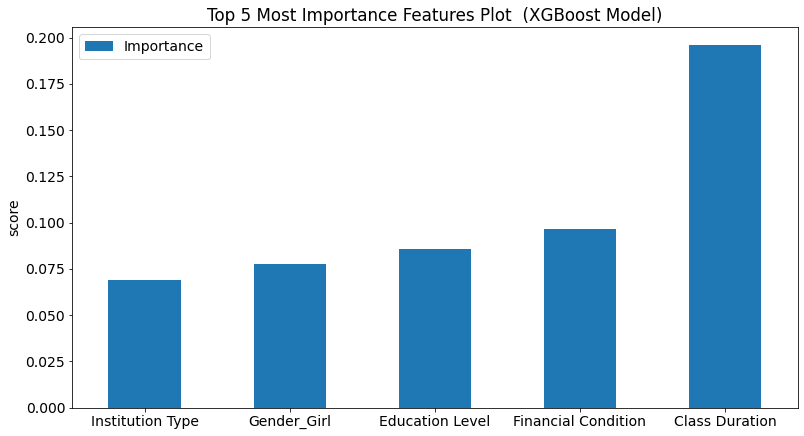

In [82]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Top 5 Most Importance Features Plot  (XGBoost Model)')

xgb_imp.sort_values('Importance')[-5:].plot(kind='bar', ax=ax)
plt.ylabel('score')
plt.xticks(rotation=0)
plt.savefig('feat_imp_xgb.png' ,dpi=300)
plt.show()

### Hyperparameter Tuning (Balance Data)

In [83]:
# using the same function created for imbalanced data 
tuned_models_bal = parameter_search(model_params, X_train_bal, y_train_bal)

Logistic Regression, Tuned Hyperparameters : {'max_iter': 1000, 'C': 10} 

Decision Tree, Tuned Hyperparameters : {'min_samples_split': 2, 'max_depth': 15} 

KNN, Tuned Hyperparameters : {'n_neighbors': 1} 

Random Forest, Tuned Hyperparameters : {'n_estimators': 10, 'min_samples_split': 3, 'max_depth': 12} 

SVC, Tuned Hyperparameters : {'kernel': 'rbf', 'C': 1000} 

XGBoost, Tuned Hyperparameters : {'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.3} 



In [84]:
eval_df_bal_tuned = []

# Iterate through the tuned models 
for name, model in tuned_models_bal.items():
    res_df, cf_matrix = create_result_df(name, model, X_test_bal, y_test_bal)
    eval_df_bal_tuned.append(res_df)
    
    del res_df, cf_matrix, model

In [85]:
eval_df_bal_tuned = pd.concat(eval_df_bal_tuned)
eval_df_bal_tuned.set_index('Model_Name', inplace=True)
eval_df_bal_tuned.columns = eval_df_bal_tuned.columns + '_tuned'

eval_df_bal_tuned

,Test_Accuracy_tuned,F1_Score_tuned,ROC_AUC_tuned
Model_Name,,,
Logistic Regression,0.706667,0.702916,0.796480
Decision Tree,0.920000,0.919249,0.983312
KNN,0.866667,0.866159,0.900000
Random Forest,0.922667,0.921777,0.982101
SVC,0.802667,0.799199,0.928501
XGBoost,0.925333,0.924656,0.984864


,Model_Name,F1_Score,F1_Score_tuned
0,Logistic Regression,0.702916,0.702916
1,Decision Tree,0.919249,0.919249
2,KNN,0.836890,0.866159
3,Random Forest,0.921964,0.921777
4,SVC,0.592858,0.799199
5,XGBoost,0.924656,0.924656


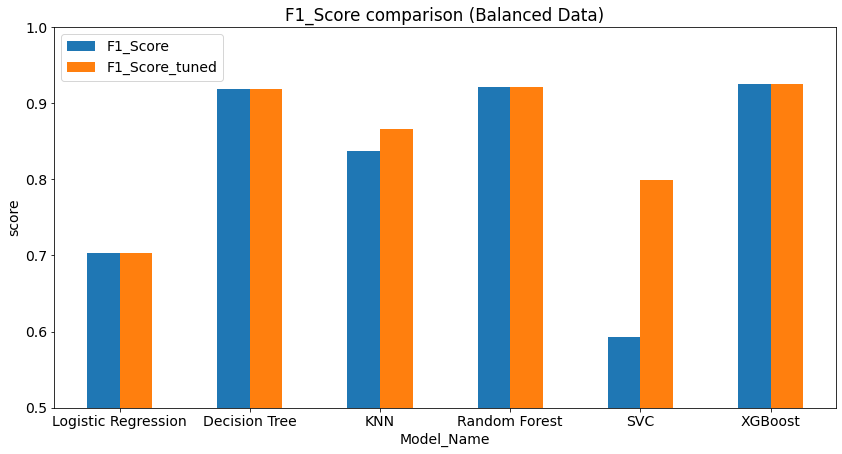

In [86]:
tuned_model_result_diff('F1_Score', eval_df_bal, eval_df_bal_tuned, 'F1_Score comparison (Balanced Data)')

Tuning the hyperparameters of the Logistic Regression, Decision Tree, Random Forest and XGBoost when trained on the balanced dataset results in no  improvement in F1 score. <p>
However KNN and SVC perform better with tuned parameters.

### Cross Validation (XGBoost)

In [87]:
fold = KFold(n_splits=5, shuffle=True, random_state=0) 

In [88]:
n = 1
test_preds_cv = []
for train_index, test_index in fold.split(X_train_bal, y_train_bal):
    print('{} fold'.format(n))
    train_set, val_set = X_train_bal.iloc[train_index], X_train_bal.iloc[test_index]
    y_train_set, y_val_set = y_train_bal.iloc[train_index], y_train_bal.iloc[test_index] 
    
    model = XGBClassifier(random_state=20, n_estimators=1000, tree_method="hist", 
                          enable_categorical=True,  early_stopping_rounds=50, eval_metric = 'auc')
    model.fit(train_set, y_train_set, eval_set=[(val_set, y_val_set)], verbose=100)
    
    test_preds=model.predict_proba(X_test_bal)    
    test_preds_cv.append(test_preds)
    n+=1
    del model, test_preds

1 fold
[0]	validation_0-auc:0.91103
[100]	validation_0-auc:0.98868
[134]	validation_0-auc:0.98863
2 fold
[0]	validation_0-auc:0.91727
[100]	validation_0-auc:0.97948
[138]	validation_0-auc:0.97778
3 fold
[0]	validation_0-auc:0.91594
[100]	validation_0-auc:0.98090
[200]	validation_0-auc:0.98189
[208]	validation_0-auc:0.98195
4 fold
[0]	validation_0-auc:0.89369
[100]	validation_0-auc:0.97637
[200]	validation_0-auc:0.97784
[259]	validation_0-auc:0.97682
5 fold
[0]	validation_0-auc:0.92459
[100]	validation_0-auc:0.97967
[200]	validation_0-auc:0.98085
[228]	validation_0-auc:0.98113


In [89]:
# Aggregate the preditions by taking the average
np.mean(test_preds_cv, axis=0)

array([[9.8661196e-01, 7.5378371e-03, 5.8502262e-03],
       [9.6426673e-05, 9.7714454e-01, 2.2759089e-02],
       [2.4776804e-04, 9.4157922e-01, 5.8172952e-02],
       ...,
       [3.4027621e-03, 3.4463027e-01, 6.5196699e-01],
       [9.9585140e-01, 6.7001616e-05, 4.0816064e-03],
       [6.6276789e-01, 2.2671867e-02, 3.1456026e-01]], dtype=float32)

In [90]:
# Determine the predicted class
y_pred_cv = np.argmax( np.mean(test_preds_cv, axis=0),  axis=1)

In [91]:
eval_df_bal_cv = pd.DataFrame()
eval_df_bal_cv['Model_Name'] = [ 'XGBoost' ]
eval_df_bal_cv['Test_Accuracy'] = [ accuracy_score(y_test_bal, y_pred_cv) ]
eval_df_bal_cv['F1_Score'] = [ f1_score(y_test_bal, y_pred_cv, average='weighted') ]
eval_df_bal_cv['ROC_AUC'] = [ roc_auc_score(y_test_bal, np.mean(test_preds_cv, axis=0), multi_class='ovr') ]


In [92]:
# new metrics of XGBoost after cross validation
eval_df_bal_cv

,Model_Name,Test_Accuracy,F1_Score,ROC_AUC
0,XGBoost,0.925333,0.924656,0.985067


In [93]:
# recalling the accuracy of XGBoost on Balanced data 
eval_df_bal.loc['XGBoost']

Test_Accuracy    0.925333
F1_Score         0.924656
ROC_AUC          0.985216
Name: XGBoost, dtype: float64

The XGBoost classifier with using a 5 KFold Cross validation technique yields an F1 Score of 0.925.<p>
However training XGBooost Classifier with the whole training dataset yields an F1_Score of 0.925 also. <p>
We can conclude that KFold cross validation is not very beneficial for our dataset becuase the F1_score metric on the test dataset does not improve.

# Compare Performance of Models on Balanced and Imbalanced Data

To compare the perfomance of models, the metric result of the each model on the imbalanced <b>(I)</b> data is subtracted from the result on the balanced data <b>(B)</b> 
###  Balanced - Imbalanced   ( B - I )

In [94]:
compare_df = pd.DataFrame()
compare_df['Model_Name'] = eval_df.index


for metric in ['Test_Accuracy', 'F1_Score', 'ROC_AUC']:
    # Calculate difference between metric results ( B-I )
    change = eval_df_bal[metric].values - eval_df[metric].values
    
    # Calculate percentage change (increase or decrease) of results ( B-I )
    new_col_name = 'perc_change_{}'.format(metric.lower())
    compare_df[new_col_name] = (change/eval_df[metric].values) * 100
    
    # Create column that shows the sentiment in the difference of results ( B-I )  
    compare_df['{}_change_sentiment'.format(metric.lower())] = compare_df[new_col_name].apply(lambda x: 'Positive' if x >0 else 'Negative')

In [95]:
compare_df

,Model_Name,perc_change_test_accuracy,test_accuracy_change_sentiment,perc_change_f1_score,f1_score_change_sentiment,perc_change_roc_auc,roc_auc_change_sentiment
0,Logistic Regression,-2.122605,Negative,1.834040,Positive,0.881785,Positive
1,Decision Tree,-0.573991,Negative,-0.613123,Negative,0.268373,Positive
2,KNN,10.877656,Positive,11.324090,Positive,3.083837,Positive
3,Random Forest,1.535464,Positive,1.596580,Positive,-0.087880,Negative
4,SVC,-8.368172,Negative,-0.399856,Negative,-0.909345,Negative
5,XGBoost,0.907391,Positive,0.915484,Positive,-0.272349,Negative


The table above shows the difference in results of models trained on Balanced and the Imbalanced Data

In [96]:
# showing the the models that only show improvment in metrics after balancing the data 
compare_df[compare_df['f1_score_change_sentiment']=='Positive']

,Model_Name,perc_change_test_accuracy,test_accuracy_change_sentiment,perc_change_f1_score,f1_score_change_sentiment,perc_change_roc_auc,roc_auc_change_sentiment
0,Logistic Regression,-2.122605,Negative,1.834040,Positive,0.881785,Positive
2,KNN,10.877656,Positive,11.324090,Positive,3.083837,Positive
3,Random Forest,1.535464,Positive,1.596580,Positive,-0.087880,Negative
5,XGBoost,0.907391,Positive,0.915484,Positive,-0.272349,Negative


KNN, Random Forest, SVC and XGBoost are models that improved in performance when trained on Balanced dataset

In [97]:
compare_df.set_index('Model_Name', inplace=True)
compare_df['perc_change_f1_score'].idxmax()

'KNN'

KNN shows the highest improvment after balancing the data with almost 11%

In [98]:
# DataFrame tocompare F1-score between Balanced and Imbalanced Data 
f_score_df = pd.DataFrame()
f_score_df['Imbalanced Data'] = eval_df['F1_Score']
f_score_df['Balanced Data'] = eval_df_bal['F1_Score']
f_score_df.reset_index(inplace=True)
f_score_df

,Model_Name,Imbalanced Data,Balanced Data
0,Logistic Regression,0.690257,0.702916
1,Decision Tree,0.924919,0.919249
2,KNN,0.751760,0.836890
3,Random Forest,0.907475,0.921964
4,SVC,0.595238,0.592858
5,XGBoost,0.916268,0.924656


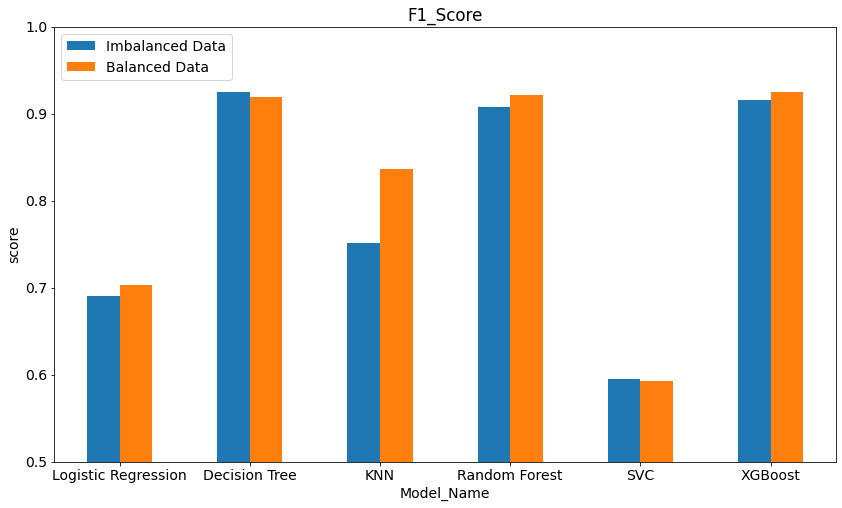

In [99]:
# ploting the difference 
fig, ax = plt.subplots(figsize=(14,8))
f_score_df.plot(x='Model_Name', kind='bar', ax=ax)

plt.ylim(0.5, 1)
plt.ylabel('score')
plt.title('F1_Score')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.savefig('f_score.png', dpi=300)

From the plot above, f1_score improved for most models afetr balancing the data, except Decision Tree and Support Vector classifiers that shows a slight decrease .<p>